In [ ]:
# build the linear regression model using scikit learn in boston data to predict "price" based on other dependent variable

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
%matplotlib inline

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston1=pd.DataFrame(boston.data,columns=boston.feature_names)
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
boston1['price']=boston.target
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


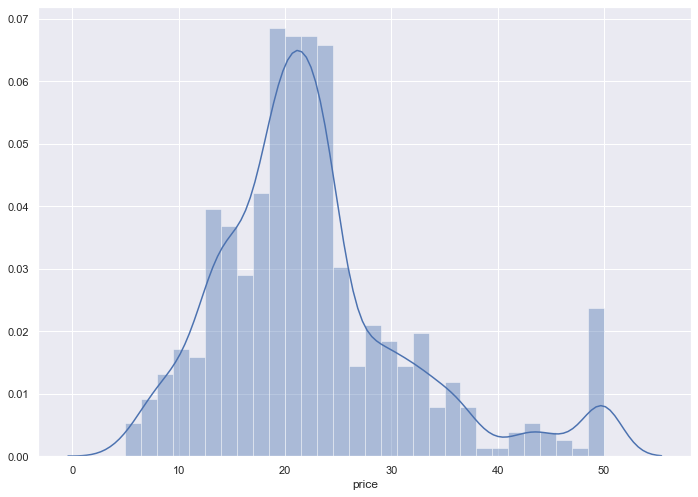

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston1['price'], bins=30)
plt.show()

In [8]:
corr_matric=boston1.corr()
corr_matric

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


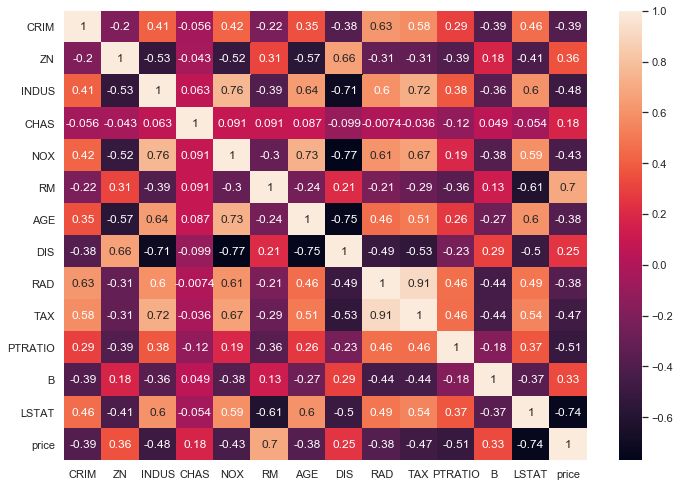

In [9]:
sns.heatmap(data=corr_matric,annot=True)
# annot is used for the print the value inside the box

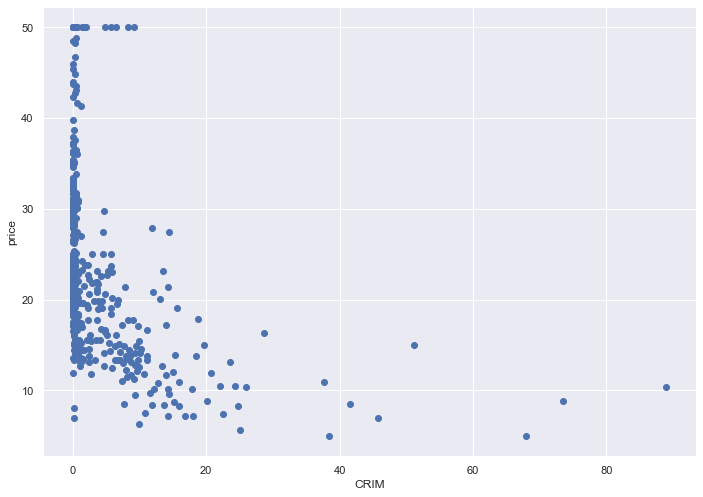

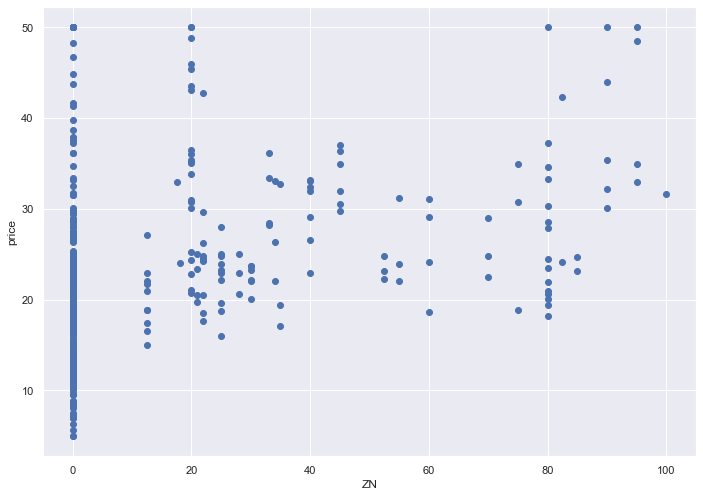

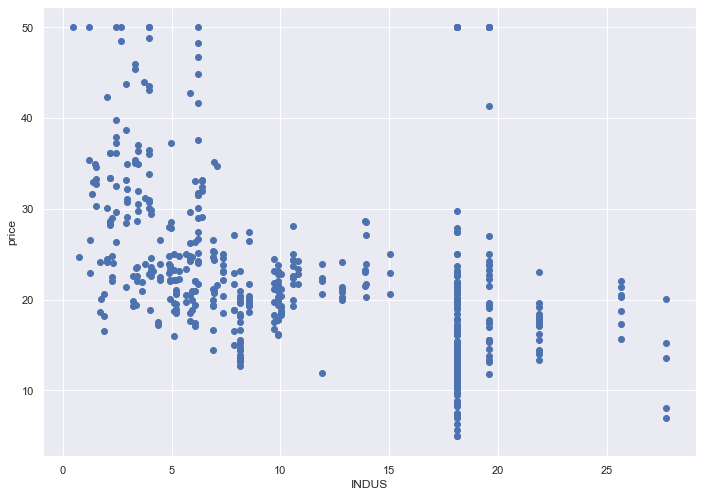

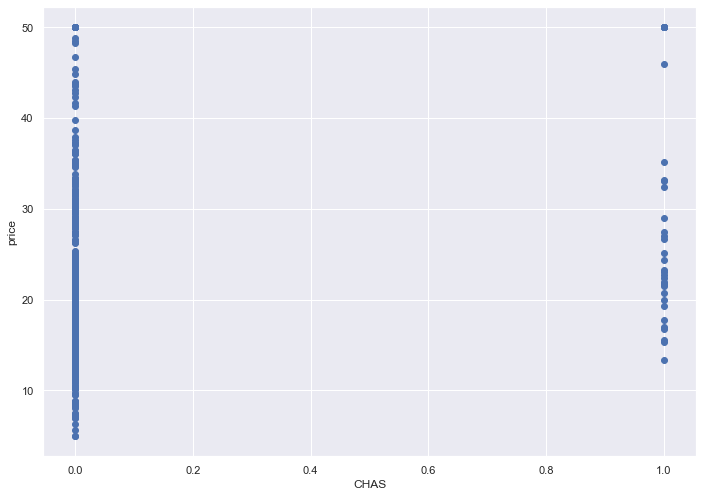

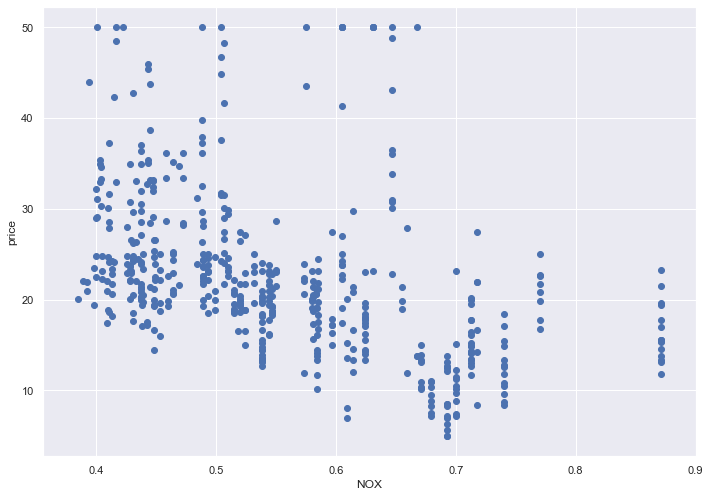

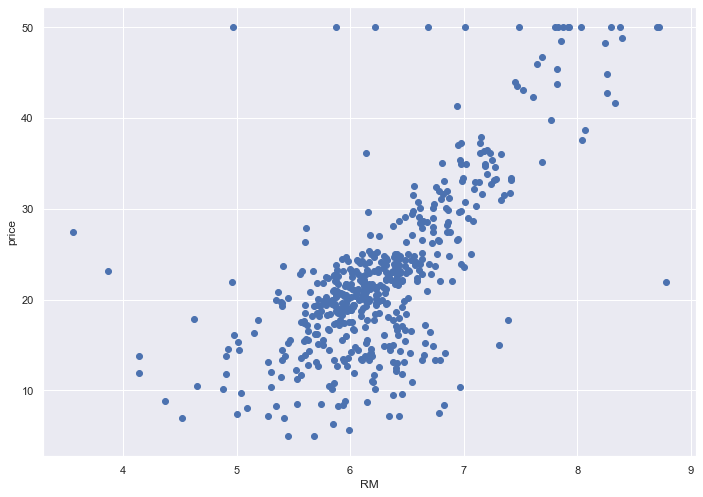

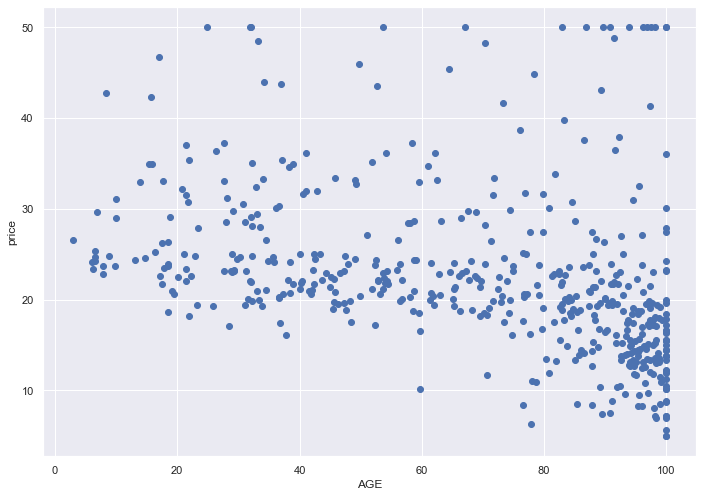

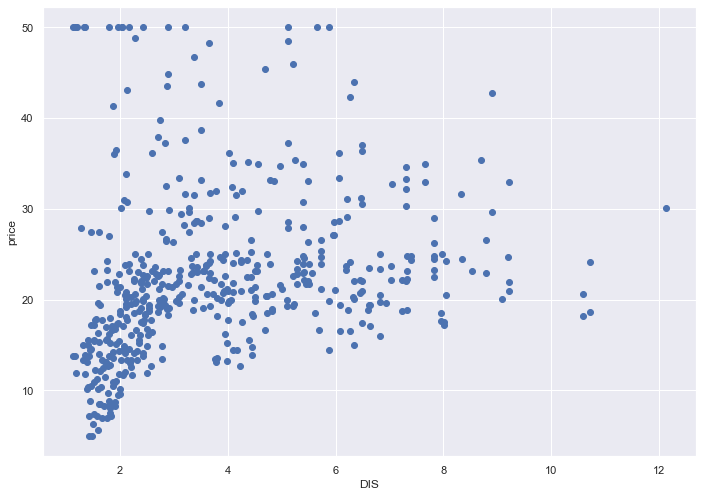

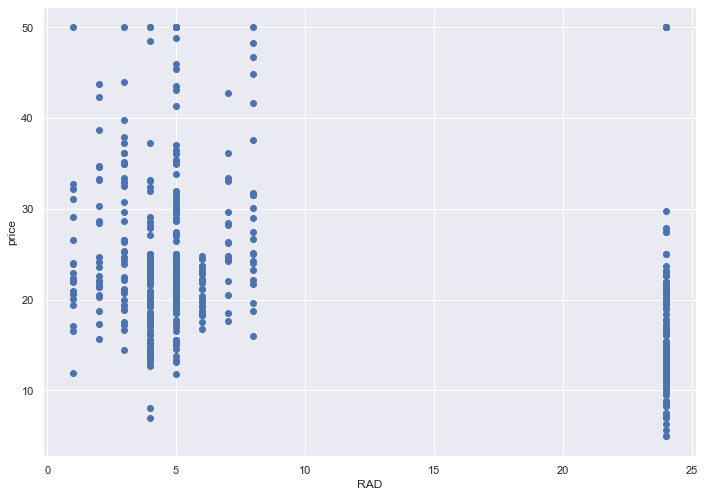

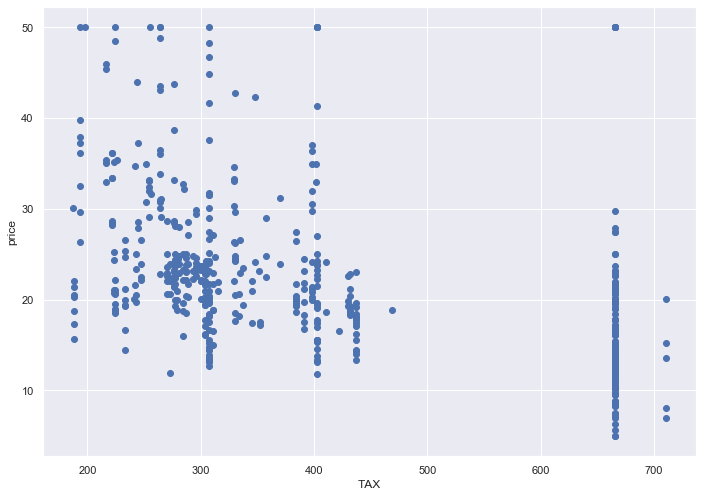

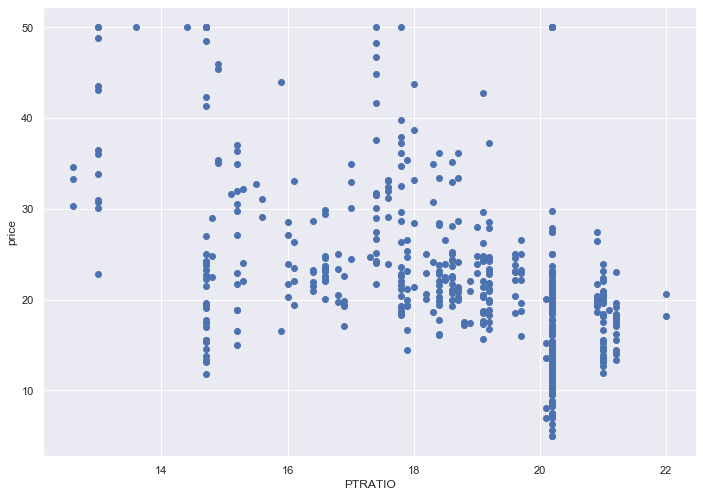

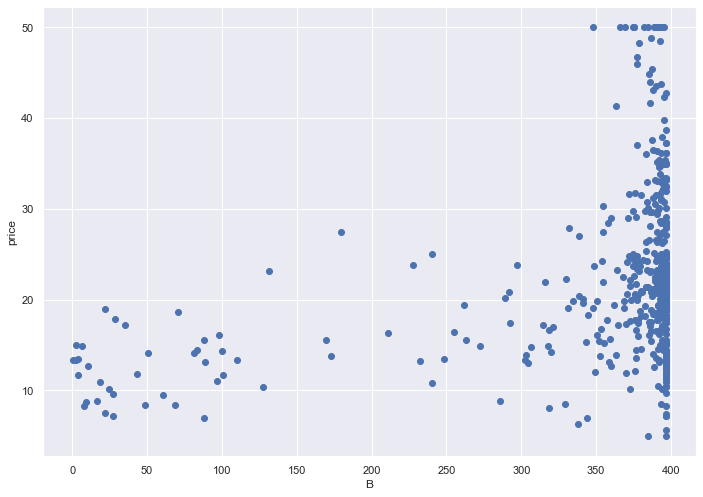

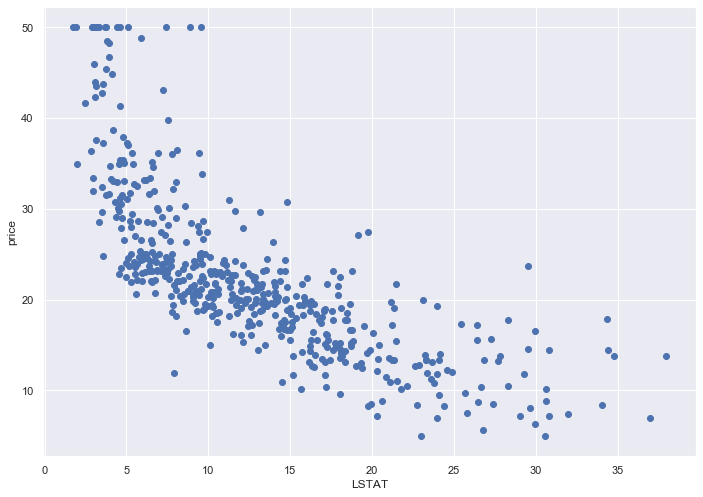

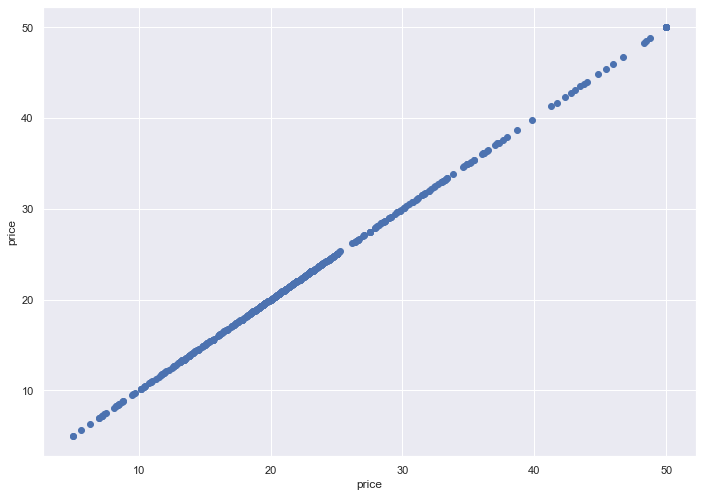

In [44]:
for col in boston1.columns:
    if(col != ['price']):
        plt.scatter(boston1[col],boston1['price'])
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

In [57]:
x=boston1.drop(columns=['price'])
y=boston1['price']

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=100)

In [60]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# import statsmodels.api as sm in this formula is sm.OLS(formula ='') it give error __init__() missing 1 required positional argument: 'endog'
import statsmodels.formula.api as smf #we use this import to run smf.ols(formula='')
lm1=smf.ols(formula='price ~ RM+LSTAT+PTRATIO',data=boston1).fit()
lm1.conf_int()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Thu, 28 May 2020   Prob (F-statistic):          2.69e-123
Time:                        17:21:36   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# this fuction is present in statsmodels
print(lm1.pvalues) # it reject the null hypothesis  and also show relationship in features and price
print(lm1.rsquared_adj)

Intercept    2.725808e-06
RM           7.734793e-24
LSTAT        7.944208e-36
PTRATIO      1.644660e-14
dtype: float64
0.6767035874132712


In [63]:
from sklearn.metrics import mean_squared_error,r2_score
y_predict = lm.predict(x_train)
rmse= (np.sqrt(mean_squared_error(y_train,y_predict)))
r_sqr=r2_score(y_train,y_predict)

In [64]:
print('RMSE is {}  for the training set'.format(rmse))
print('r_square error is {} for the training set '.format(r_sqr))

RMSE is 4.652889093008086  for the training set
r_square error is 0.7337332767917557 for the training set 


In [65]:
y_test_predict = lm.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r_squr_test=r2_score(y_test,y_test_predict)
print('RMSE is {} for the testing set'.format(rmse_test))
print('r_square is {} for the testing set'.format(r_squr_test))

RMSE is 4.8597318959551385 for the testing set
r_square is 0.7555033086871294 for the testing set


In [66]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = lm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [67]:
print('adjusted r_square value for training ',adj_r2(x_train,y_train))
print('adjusted r_square value for testing ',adj_r2(x_test,y_test))

adjusted r_square value for training  0.7248577193514809
adjusted r_square value for testing  0.7193844792886372


In [68]:
_,p_values=stats.ttest_ind(a=x_train,b=y_train,equal_var=False)
print(p_values)

[2.15197063e-177 2.16086404e-177 1.44611888e-177 2.22131911e-177
 1.52713581e-177 1.54793074e-177 1.69790757e-177 2.21977923e-177
 1.76990104e-177 1.45624211e-177 2.78240714e-177 5.89513264e-177
 1.50569261e-177]


In [69]:
_,p_values1=stats.ttest_ind(a=x_test,b=y_test,equal_var=False)
print(p_values1)

[1.26819598e-41 1.02648896e-41 1.49205375e-41 8.98041947e-42
 1.41056490e-41 1.38214524e-41 1.27485719e-41 1.03195963e-41
 1.24328209e-41 1.47071208e-41 8.23283938e-42 4.35641489e-42
 1.37329784e-41]


In [70]:
#saving the model to the local file system
filename = "final_model.pickle"
pickle.dump(lm, open(filename,'wb'))

In [71]:
load_model = pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.transform([[0.00632,18.0,2.31,0.0,.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]]))
print(a)

[29.81306831]


In [40]:
boston1[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
